In [26]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.special import binom

In [14]:
%matplotlib notebook

# Puzzler Express, 23 Aug 2019

"You are an expert counterfeiter, and you specialize in forging one of the most ubiquitous notes in global circulation, the U.S. $100 bill. You’ve been able to fool the authorities with your carefully crafted C-notes for some time, but you’ve learned that new security features will make it impossible for you to continue to avoid detection. As a result, you decide to deposit as many fake notes as you dare before the security features are implemented and then retire from your life of crime.

You know from experience that the bank can only spot your fakes 25 percent of the time, and trying to deposit only counterfeit bills would be a ticket to jail. However, if you combine fake and real notes, there’s a chance the bank will accept your money. You have $2,500 in bona fide hundreds, plus a virtually unlimited supply of counterfeits. The bank scrutinizes cash deposits carefully: They randomly select 5 percent of the notes they receive, rounded up to the nearest whole number, for close examination. If they identify any note in a deposit as fake, they will confiscate the entire sum, leaving you only enough time to flee.

How many fake notes should you add to the $2,500 in order to maximize the expected value of your bank account? How much free money are you likely to make from your strategy?"

In [46]:
def p_accept(n_fake_max=200, it=1000, n_real=25, f_select=0.05, p_fake_accept=0.75, p_real_accept=1.0):
    value = 100
    df_raw = pd.DataFrame({"fake": pd.Series([], dtype="int32"), "p_accept": []})
    df_mean = pd.DataFrame({"fake": [], "p_accept": [], "max_profit": []})
    for n_fake in range(n_fake_max):
        n = n_fake + n_real
        c = np.concatenate( (np.full(n_fake, p_fake_accept), np.full(n_real, p_real_accept)) )
        n_select = math.ceil(n * f_select)
    
        p = np.prod( np.random.choice(c, (it, n_select)), axis=1 )
        df = pd.DataFrame({"fake": n_fake, "p_accept": p})
        df_raw = df_raw.append(df, ignore_index=True)
        
        # formula for sampling without 
        # https://en.wikipedia.org/wiki/Hypergeometric_distribution
        pt = 0
        for k in range(n_select+1):
            pk = binom(n_fake, k) * binom(n-n_fake, n_select-k) / binom(n, n_select)
            p_accept_ther = pk * p_fake_accept ** k
            pt += p_accept_ther
        
        df_mean = df_mean.append({"fake": n_fake, "p_accept": np.mean(p), "p_accept_ther": pt, "max_profit": n_fake * value}, ignore_index=True)
        
    df_mean['expected_profit'] = df_mean['p_accept_ther'] * df_mean['max_profit'] - (1.0 - df_mean['p_accept_ther']) * n_real * value
    
    return df_raw, df_mean

In [47]:
df_raw, df_mean = p_accept(n_fake_max=200)

<IPython.core.display.Javascript object>


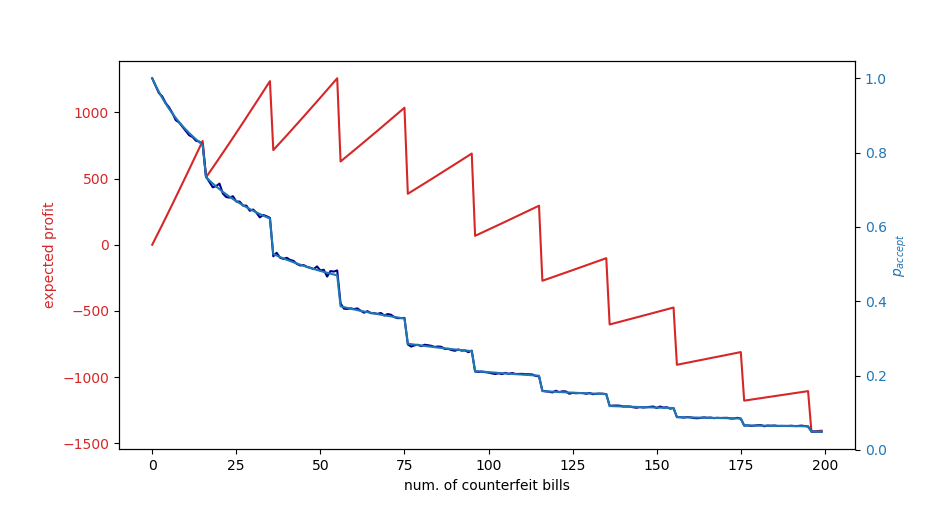

In [54]:
fig, ax1 = plt.subplots(figsize=(8,4))
c1 = 'tab:red'
ax1.set_xlabel('num. of counterfeit bills')
ax1.set_ylabel('expected profit', color=c1)
ax1.tick_params(axis='y', labelcolor=c1)
ax1.plot(df_mean["fake"], df_mean["expected_profit"], color=c1)

c2 = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('$p_{accept}$', color=c2)
ax2.tick_params(axis='y', labelcolor=c2)
ax2.plot(df_mean["fake"], df_mean["p_accept"], color='#000088')
ax2.plot(df_mean["fake"], df_mean["p_accept_ther"], color=c2)
fig.show()

In [49]:
df_mean.iloc[df_mean['expected_profit'].idxmax()]

fake                 55.000000
p_accept              0.482887
max_profit         5500.000000
p_accept_ther         0.469611
expected_profit    1256.890953
Name: 55, dtype: float64

In [35]:
for K in range(200):
    N = 25 + K
    n = math.ceil(N * 0.05)
    pt = 0
    for k in range(n+1):
        pk = binom(K, k) * binom(N-K, n-k) / binom(N, n)
        p_accept = pk * (0.75) ** k
        pt += p_accept
        #print(k, pk, p_accept)
    print(K, pt)

0 1.0
1 0.9807692307692308
2 0.9631410256410255
3 0.9469246031746031
4 0.9319581280788176
5 0.9181034482758621
6 0.905241935483871
7 0.8932711693548387
8 0.8821022727272727
9 0.8716577540106952
10 0.8618697478991596
11 0.8526785714285715
12 0.8440315315315314
13 0.835881934566145
14 0.8281882591093117
15 0.8209134615384616
16 0.7339352720450281
17 0.7251197735191639
18 0.7167824730572887
19 0.7088858634098459
20 0.701396229739253
21 0.6942831851119894
22 0.6875192722787542
23 0.6810796210106382
24 0.674941652192792
25 0.6690848214285714
26 0.6634903961584633
27 0.6581412613122172
28 0.653021749338342
29 0.6481174911304628
30 0.643415284924719
31 0.6389029806998558
32 0.6345693779904306
33 0.6304041353383458
34 0.6263976898704974
35 0.6225411857101111
36 0.5269760712386582
37 0.5229208284223217
38 0.5190169220010409
39 0.5152561177849808
40 0.5116307635996397
41 0.5081337390907703
42 0.5047584106075828
43 0.5014985905775524
44 0.498348500862058
45 0.4953027396471243
46 0.492356251479465